In [6]:
import os
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

source_path = '/content/drive/MyDrive/Machin_Learning/test_task/source'
target_path = '/content/drive/MyDrive/Machin_Learning/test_task/target'
target_images = load_images_from_folder(target_path)
source_images = load_images_from_folder(source_path)

In [7]:
len(target_images), len(source_images)

(5, 54)

In [8]:
pic = '/content/drive/MyDrive/Machin_Learning/test_task/target/target1.jpg'

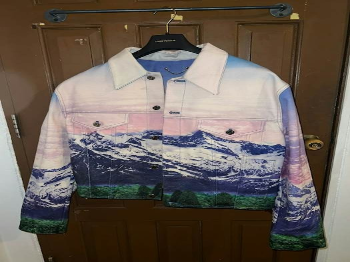

(262, 350, 3)

In [9]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
img = cv2.imread(pic, cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, [int(ind * .5) for ind in img.shape[0:2]])
cv2_imshow(img)
img.shape

In [10]:
[int(ind * .25) for ind in img.shape[0:2]]
np.multiply(img.shape[0:2], .25)

array([65.5, 87.5])

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image, model):
    image = image.convert('RGB')  # Convert image to RGB
    image = image.resize((224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    features = model.predict(image)
    return features

source_features = np.array([extract_features(img, model) for img in source_images])
target_features = np.array([extract_features(img, model) for img in target_images])

1/1 [==============================] - 0s 188ms/step


In [12]:
source_features.shape

(54, 1, 2048)

In [18]:
source_features_reshaped = source_features.reshape(len(source_images), -1)
target_features_reshaped = target_features.reshape(len(target_images), -1)

target_features_reshaped.shape

(5, 2048)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
def find_similar_images(target_feature, source_features_reshaped):
    similarities = cosine_similarity([target_feature], source_features_reshaped)
    return np.argsort(similarities[0])[::-1]

similar_images = [find_similar_images(target, source_features_reshaped) for target in target_features_reshaped]

In [15]:
len(similar_images)

5

In [16]:
def get_similar_images_filenames(indices, folder):
    filenames = os.listdir(folder)
    return [filenames[i] for i in indices]

for index, similar_indices in enumerate(similar_images):
    print(f"Target Image {index + 1}:")
    similar_filenames = get_similar_images_filenames(similar_indices, '/content/drive/MyDrive/Machin_Learning/test_task/source')
    print(similar_filenames[:5])  # top 5 similar images


Target Image 1:
['0a00c322-aae9-4e31-a952-ba098878d6a2.jpg', '01a42204-c88b-4b33-941d-c4e6f46499c5.jpg', '0afdce4c-620b-4b77-82f6-9a8ecd9bea09.jpg', '0a57813e-1b38-469d-876d-238c284f8ae3.jpg', '0a3cc004-68c3-48d2-b3f6-f48b9f1d7dba.jpg']
Target Image 2:
['00c5c2e1-eaf1-4565-9865-45bcb712b484.jpg', '0a95e871-b5fb-473c-a316-b6176be59a51.jpg', '0a2ced8f-4fd0-4456-a734-f601fd267bf8.jpg', '0aec3137-a0ca-42f5-8741-73c0167449b1.jpg', '0aef2e4e-9ffa-457c-bb2d-0be87ebb149d.jpg']
Target Image 3:
['0a1bd89b-760f-4bff-8b1a-b386bddc51ad.jpg', '0a947e96-a905-48d6-9a8c-103b4e1f5641.jpg', '0a5b9ed0-74c1-4338-a01d-f05b64228f33.jpg', '0a756000-148d-4826-b24d-b48986ec69e3.jpg', '0a8ce4a8-9f70-4580-a59b-b3863eae4137.jpg']
Target Image 4:
['0afdce4c-620b-4b77-82f6-9a8ecd9bea09.jpg', '0a82f9f2-0750-478c-ad73-40b53a9800fb.jpg', '0a00c322-aae9-4e31-a952-ba098878d6a2.jpg', '01a42204-c88b-4b33-941d-c4e6f46499c5.jpg', '0a28ec65-5126-4850-bb7e-533fab78aa69.jpg']
Target Image 5:
['0a00c322-aae9-4e31-a952-ba098878d6

Similar Images for Target Image 1:
Similar Image 1: 0a00c322-aae9-4e31-a952-ba098878d6a2.jpg


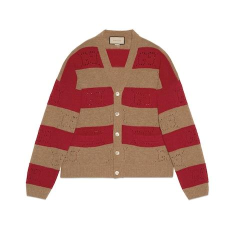

Similar Image 2: 01a42204-c88b-4b33-941d-c4e6f46499c5.jpg


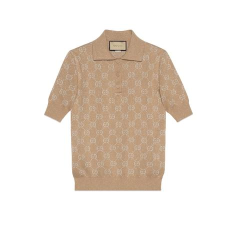

Similar Image 3: 0afdce4c-620b-4b77-82f6-9a8ecd9bea09.jpg


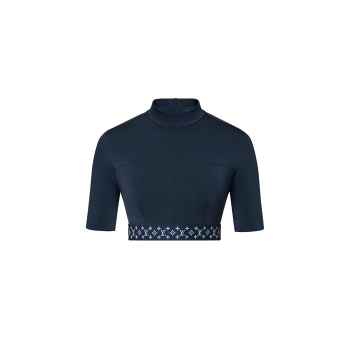

Similar Image 4: 0a57813e-1b38-469d-876d-238c284f8ae3.jpg


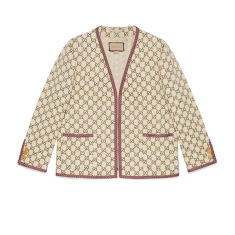

Similar Image 5: 0a3cc004-68c3-48d2-b3f6-f48b9f1d7dba.jpg


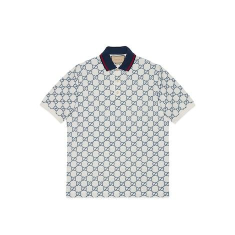

Similar Images for Target Image 2:
Similar Image 1: 00c5c2e1-eaf1-4565-9865-45bcb712b484.jpg


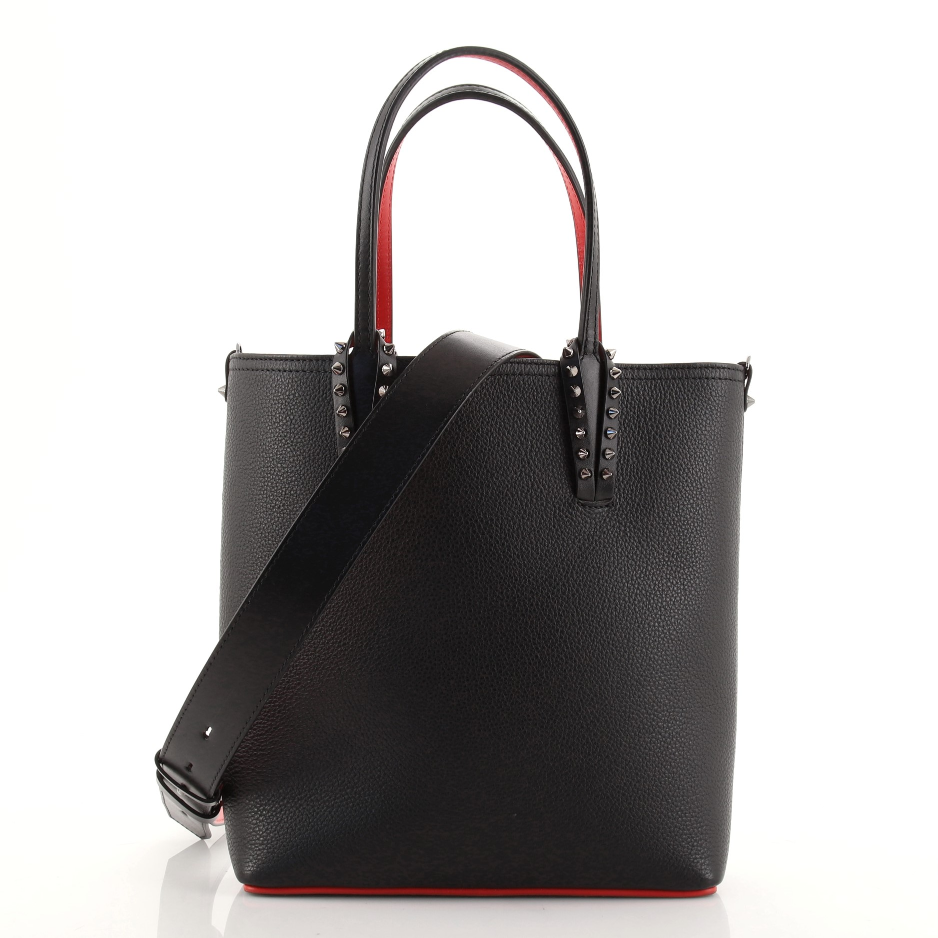

Similar Image 2: 0a95e871-b5fb-473c-a316-b6176be59a51.jpg


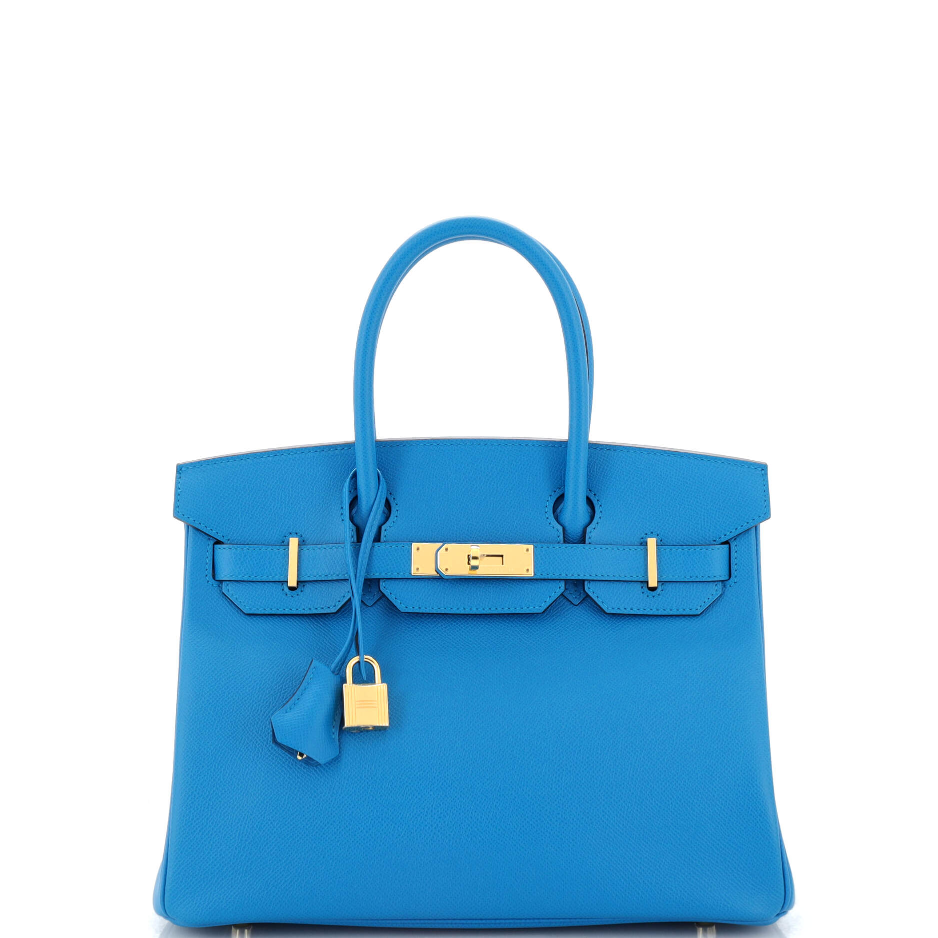

Similar Image 3: 0a2ced8f-4fd0-4456-a734-f601fd267bf8.jpg


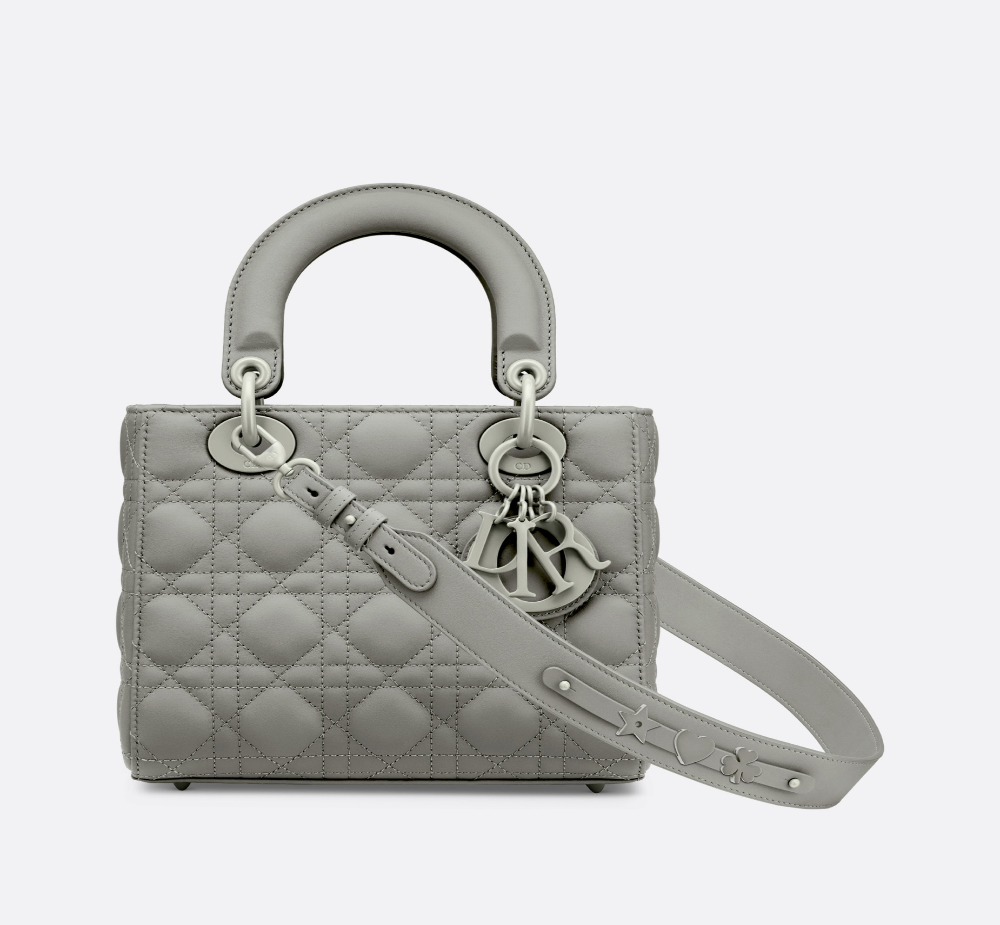

Similar Image 4: 0aec3137-a0ca-42f5-8741-73c0167449b1.jpg


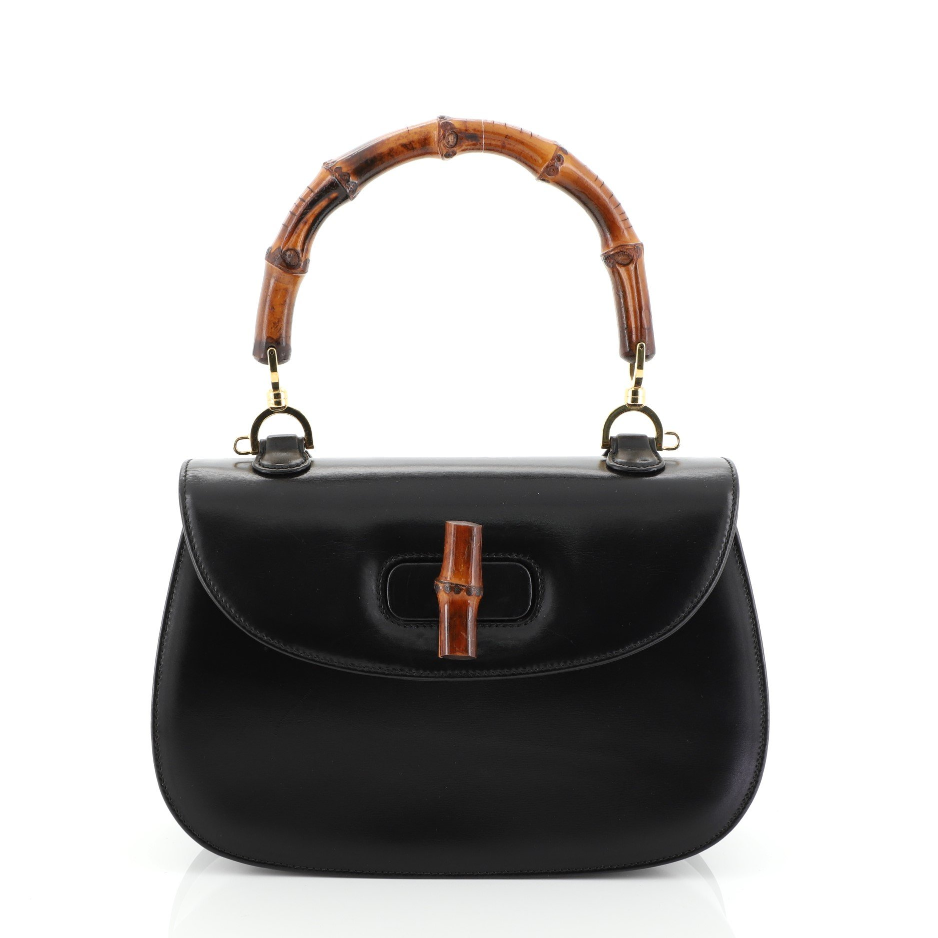

Similar Image 5: 0aef2e4e-9ffa-457c-bb2d-0be87ebb149d.jpg


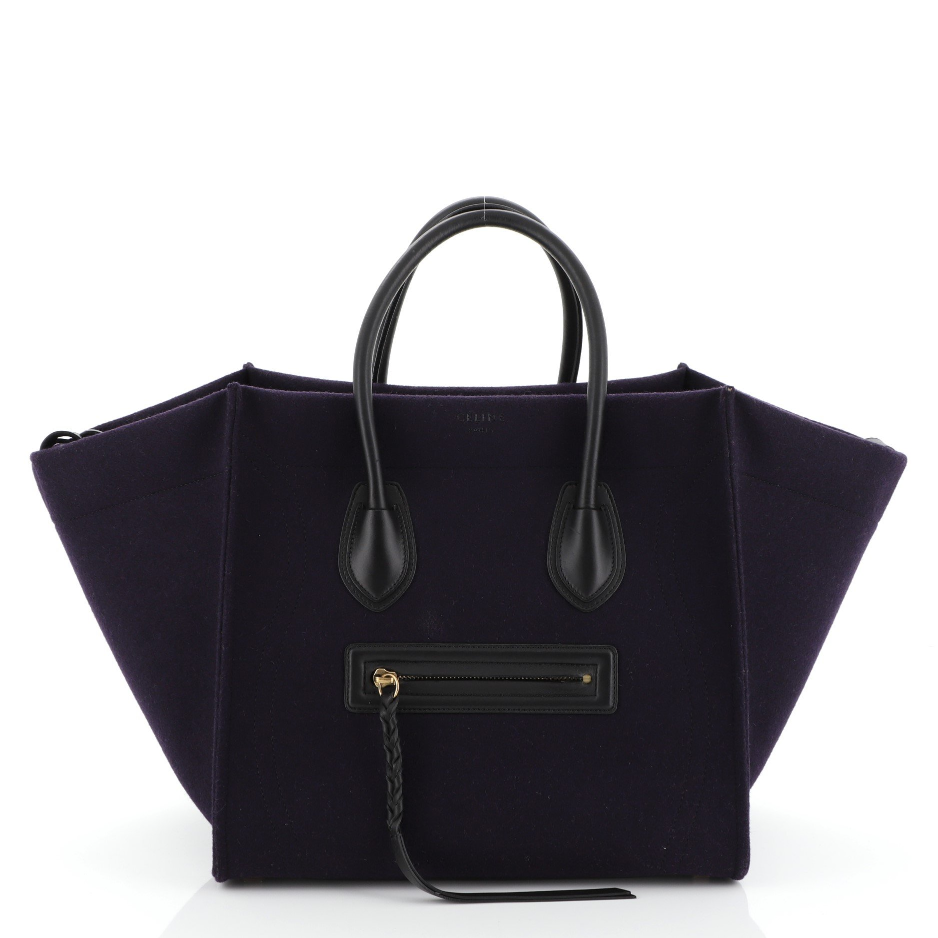

Similar Images for Target Image 3:
Similar Image 1: 0a1bd89b-760f-4bff-8b1a-b386bddc51ad.jpg


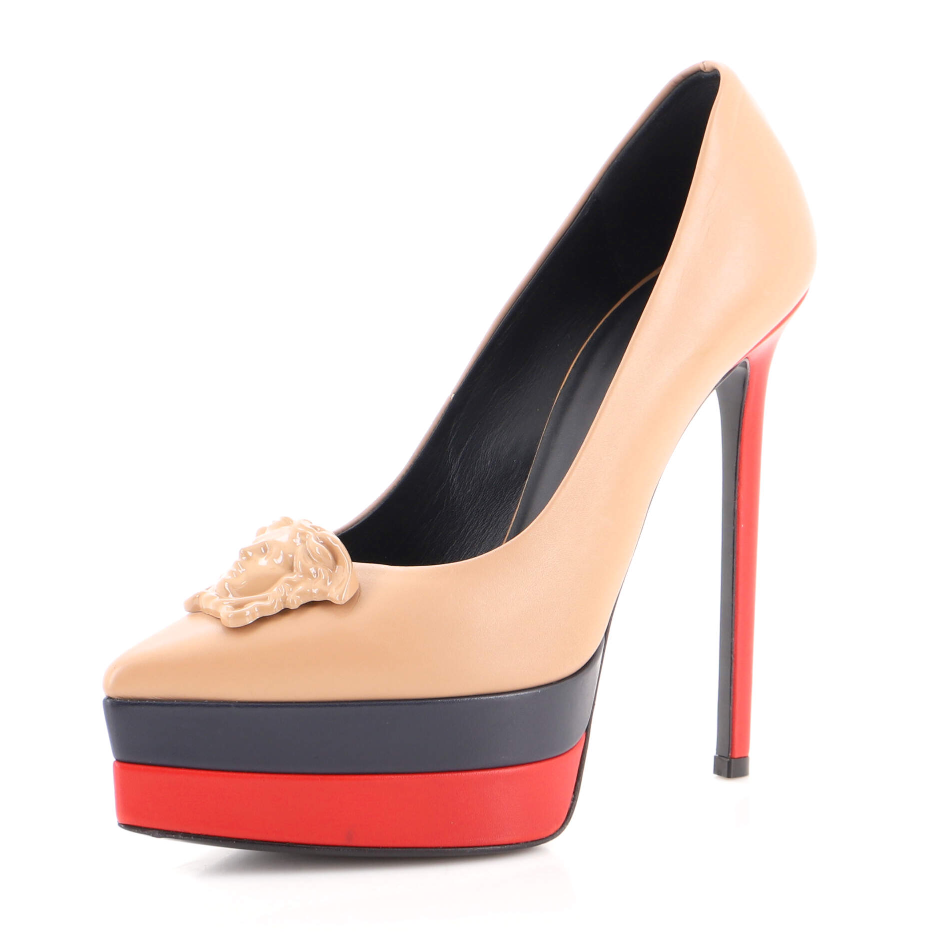

Similar Image 2: 0a947e96-a905-48d6-9a8c-103b4e1f5641.jpg


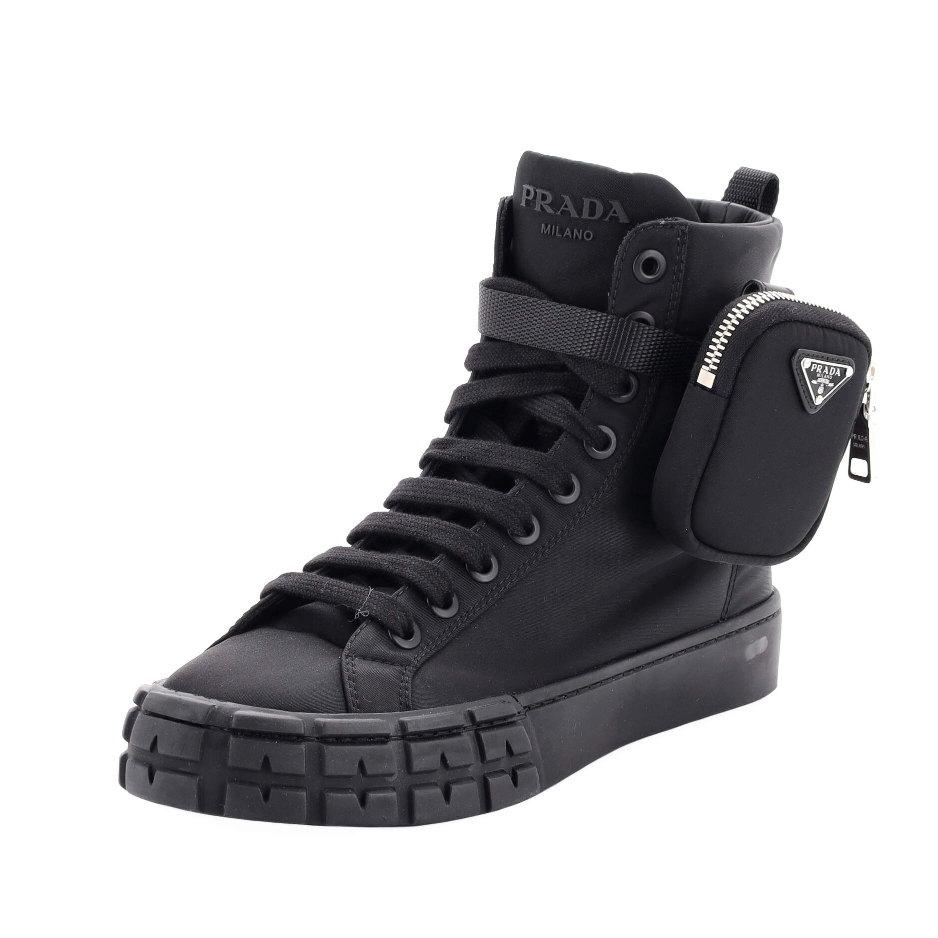

Similar Image 3: 0a5b9ed0-74c1-4338-a01d-f05b64228f33.jpg


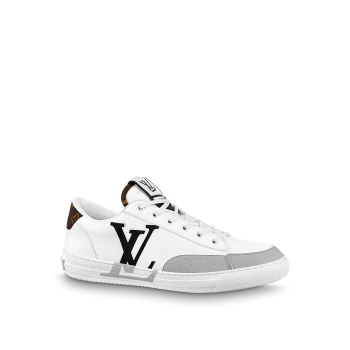

Similar Image 4: 0a756000-148d-4826-b24d-b48986ec69e3.jpg


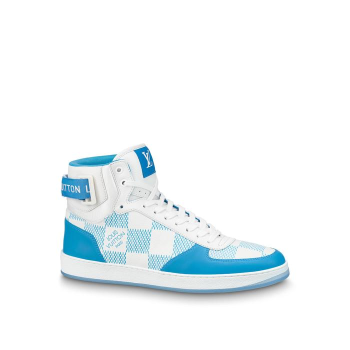

Similar Image 5: 0a8ce4a8-9f70-4580-a59b-b3863eae4137.jpg


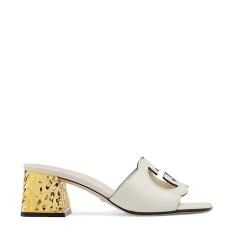

Similar Images for Target Image 4:
Similar Image 1: 0afdce4c-620b-4b77-82f6-9a8ecd9bea09.jpg


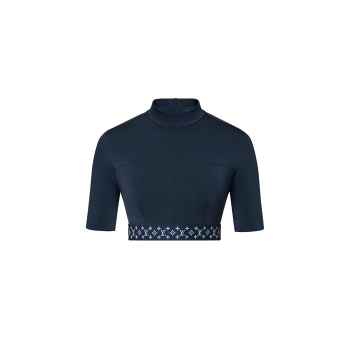

Similar Image 2: 0a82f9f2-0750-478c-ad73-40b53a9800fb.jpg


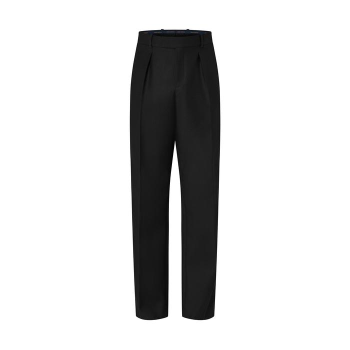

Similar Image 3: 0a00c322-aae9-4e31-a952-ba098878d6a2.jpg


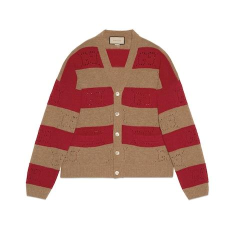

Similar Image 4: 01a42204-c88b-4b33-941d-c4e6f46499c5.jpg


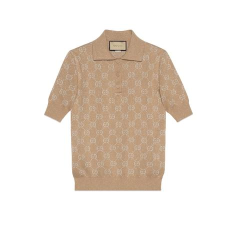

Similar Image 5: 0a28ec65-5126-4850-bb7e-533fab78aa69.jpg


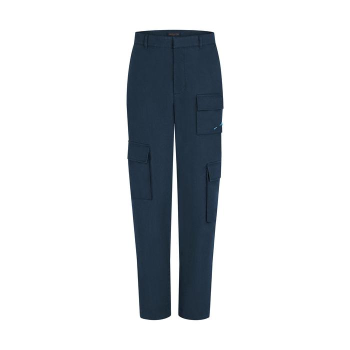

Similar Images for Target Image 5:
Similar Image 1: 0a00c322-aae9-4e31-a952-ba098878d6a2.jpg


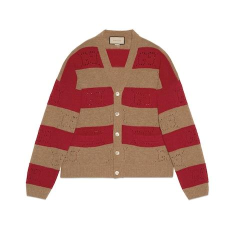

Similar Image 2: 0afdce4c-620b-4b77-82f6-9a8ecd9bea09.jpg


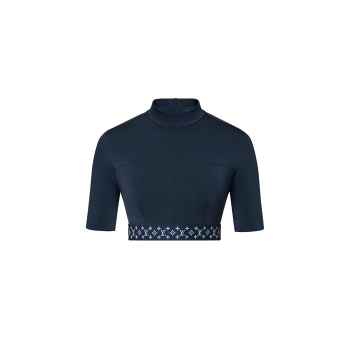

Similar Image 3: 0a57813e-1b38-469d-876d-238c284f8ae3.jpg


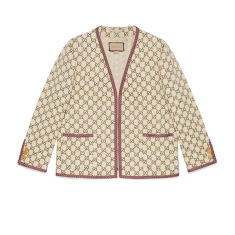

Similar Image 4: 0a3cc004-68c3-48d2-b3f6-f48b9f1d7dba.jpg


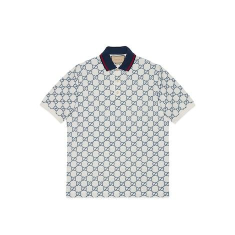

Similar Image 5: 01a42204-c88b-4b33-941d-c4e6f46499c5.jpg


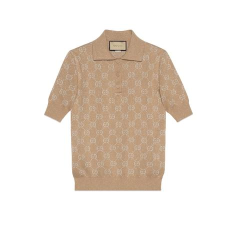

In [17]:
from google.colab.patches import cv2_imshow
import cv2
import os


def display_images_with_similarities(target_index, similar_indices, folder):
    target_image_path = os.path.join(folder, f"target_{target_index}.jpg")
    target_image = cv2.imread(target_image_path, cv2.IMREAD_UNCHANGED)
    if target_image:
        cv2_imshow(target_image)


    print(f"Similar Images for Target Image {target_index + 1}:")
    similar_filenames = get_similar_images_filenames(similar_indices, folder)

    for i, similar_filename in enumerate(similar_filenames[:5]):
        similar_image_path = os.path.join(folder, similar_filename)
        similar_image = cv2.imread(similar_image_path, cv2.IMREAD_UNCHANGED)
        print(f"Similar Image {i + 1}: {similar_filename}")
        similar_image = cv2.resize(similar_image, [int(ind * .5) for ind in similar_image.shape[0:2]])
        cv2_imshow(similar_image)

for index, similar_indices in enumerate(similar_images):
    display_images_with_similarities(index, similar_indices, '/content/drive/MyDrive/Machin_Learning/test_task/source')